# Load Dataset from Google Drive

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
# !unzip  drive/Shareddrives/Bangkit\ Capstone/leaf_datasets.zip -d .

Mounted at /content/drive


# Import Libraries

In [22]:
import os
import zipfile
import random
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
tf.random.set_seed(42)

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from shutil import copyfile
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import glob as gb
def img_count_in_folder(FOLDER_PATH):  
  print('-'*70)
  for folder in os.listdir(FOLDER_PATH):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
  print('-'*70)

In [5]:
dataset_dir = f"/content/drive/Shareddrives/Bangkit Capstone/Final_Split_Datasets"
train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")
test_dir = os.path.join(dataset_dir, "test")

In [6]:
def list_images():
  classes_dirs = os.listdir(train_dir)
  for folder in classes_dirs:
    train_classes = os.listdir(os.path.join(train_dir, folder))
    validation_classes = os.listdir(os.path.join(validation_dir, folder))
    test_classes = os.listdir(os.path.join(test_dir, folder))
    print(f"{folder}: \n \t{len(train_classes)} train images, {len(validation_classes)} validation images, and {len(test_classes)} test images,  total {len(train_classes) + len(validation_classes) + len(test_classes)} images")
    print()
list_images()

Kersen: 
 	81 train images, 23 validation images, and 13 test images,  total 117 images

Jahe: 
 	320 train images, 91 validation images, and 47 test images,  total 458 images

Pepaya: 
 	168 train images, 47 validation images, and 25 test images,  total 240 images

Lengkuas: 
 	72 train images, 20 validation images, and 11 test images,  total 103 images

Jambu Biji: 
 	154 train images, 44 validation images, and 23 test images,  total 221 images

Jeruk Purut: 
 	135 train images, 38 validation images, and 21 test images,  total 194 images

Mint: 
 	302 train images, 85 validation images, and 45 test images,  total 432 images

Kelor: 
 	153 train images, 43 validation images, and 23 test images,  total 219 images

Lemon: 
 	151 train images, 42 validation images, and 23 test images,  total 216 images

Nangka: 
 	109 train images, 31 validation images, and 16 test images,  total 156 images

Bayam Hijau: 
 	206 train images, 58 validation images, and 31 test images,  total 295 images



In [ ]:
# Load the first example of a horse
pepaya_class = os.path.join(train_dir, 'Pepaya')
sample_image  = load_img(f"{os.path.join(pepaya_class, os.listdir(pepaya_class)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (500, 500, 3)


In [28]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255. )

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='sparse',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale = 1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32, 
                                                                class_mode='sparse',
                                                                target_size=(224, 224))

  test_datagen = ImageDataGenerator(rescale= 1/255.,)

  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                batch_size=32, 
                                                                shuffle=False,
                                                                class_mode='sparse',
                                                                target_size=(224, 224))
  return train_generator, validation_generator, test_generator

In [29]:
train_generator, validation_generator, test_generator = train_val_generators(train_dir, validation_dir, test_dir)

Found 1790 images belonging to 11 classes.
Found 497 images belonging to 11 classes.
Found 261 images belonging to 11 classes.


In [9]:
from tensorflow.keras.optimizers import Adam, RMSprop
def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
  ])

  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
    

  return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [11]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
56/56 [==============================] - 858s 15s/step - loss: 2.0092 - accuracy: 0.3218 - val_loss: 1.6923 - val_accuracy: 0.4406
Epoch 2/15
56/56 [==============================] - 64s 1s/step - loss: 1.5523 - accuracy: 0.4799 - val_loss: 1.4138 - val_accuracy: 0.5111
Epoch 3/15
56/56 [==============================] - 67s 1s/step - loss: 1.2543 - accuracy: 0.5788 - val_loss: 1.3213 - val_accuracy: 0.5573
Epoch 4/15
56/56 [==============================] - 65s 1s/step - loss: 1.1325 - accuracy: 0.6140 - val_loss: 1.3115 - val_accuracy: 0.5573
Epoch 5/15
56/56 [==============================] - 64s 1s/step - loss: 0.9660 - accuracy: 0.6782 - val_loss: 1.2538 - val_accuracy: 0.5936
Epoch 6/15
56/56 [==============================] - 64s 1s/step - loss: 0.8947 - accuracy: 0.7140 - val_loss: 1.1752 - val_accuracy: 0.6258
Epoch 7/15
56/56 [==============================] - 64s 1s/step - loss: 0.6873 - accuracy: 0.7760 - val_loss: 1.1608 - val_accuracy: 0.6197
Epoch 8/15
56/56 [

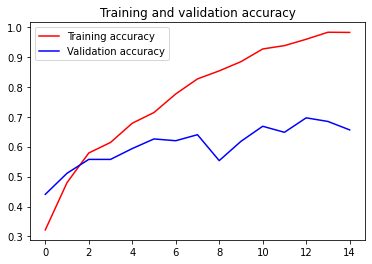

<Figure size 432x288 with 0 Axes>

In [13]:
def plot_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  
  plt.show()

plot_loss(history)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 7s 783ms/step - loss: 2.1697 - accuracy: 0.6705
Loss of the model is -  2.1697449684143066
Accuracy of the model is -  67.04980731010437 %
              precision    recall  f1-score   support

 Bayam Hijau       0.95      0.69      0.80        29
        Jahe       0.97      0.64      0.77        47
  Jambu Biji       0.36      0.40      0.38        20
 Jeruk Purut       0.31      0.38      0.34        13
       Kelor       0.68      0.68      0.68        22
      Kersen       0.85      0.85      0.85        13
       Lemon       0.96      1.00      0.98        23
    Lengkuas       0.43      0.30      0.35        10
        Mint       0.51      0.78      0.62        45
      Nangka       0.73      0.73      0.73        15
      Pepaya       0.64      0.58      0.61        24

    accuracy                           0.67       261
   macro avg       0.67      0.64      0.65       261
weighted avg       0.71      0.67      0.68       261

Confusion

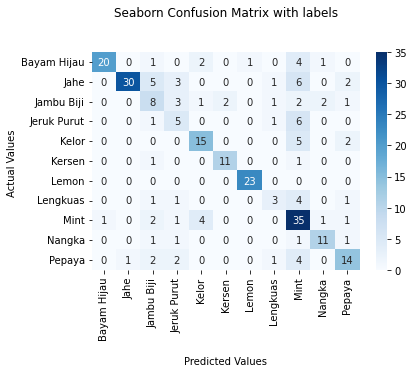

In [45]:
def evaluate_model(model, test_gen):
  evaluate = model.evaluate(test_gen)
  print('Loss of the model is - ', evaluate[0])
  print('Accuracy of the model is - ', evaluate[1]*100, '%')

  classes =  list(test_gen.class_indices.keys())
  Y_pred = model.predict(test_gen)
  y_pred = np.argmax(Y_pred, axis=1)
  
  print(classification_report(test_gen.classes, y_pred, target_names=classes))
  print('Confusion Matrix')
  conf_matrix = confusion_matrix(test_gen.classes, y_pred)
  df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order

evaluate_model(model, test_generator)

In [48]:
def load_image(img_path, show=False):

    img = load_img(img_path, target_size=(224, 224))
    img_tensor = img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

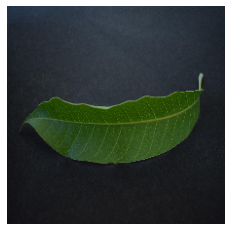

Lemon


array([1.8336947e-12, 2.6293129e-08, 1.6864279e-10, 6.2652219e-07,
       3.2134790e-09, 4.1831061e-14, 9.9998128e-01, 1.8433266e-09,
       9.7700470e-09, 1.8101942e-05, 3.1733947e-09], dtype=float32)

In [61]:
label_map = (train_generator.class_indices)
label_map = {v: k for k, v in label_map.items()}
image_path ='/content/drive/Shareddrives/Bangkit Capstone/6GBLeafDataset/Mango (P0)/healthy/0001_0026.JPG'
image = load_image(image_path, show=True)
print(label_map[np.argmax(model.predict(image))])
sum(model.predict(image))

In [ ]:
image = load_img('/content/Segmented Medicinal Leaf Images/test/Bayam Hijau/AV-S-009.jpg')

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x7EFCCAC16990>
